In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from subprocess import Popen, PIPE, call

In [ ]:
#loci_nt
path_all_all = '/home/juan/Desktop/juan/bio/mrcv/data/ss/all_all/'
path_all_21 = '/home/juan/Desktop/juan/bio/mrcv/data/ss/all_21nt/'
path_mite_all = '/home/juan/Desktop/juan/bio/mrcv/data/ss/mite_all/'
path_mite_21 = '/home/juan/Desktop/juan/bio/mrcv/data/ss/mite_21/'

#mirbase
path_mite_21_seqs = '/home/juan/Desktop/juan/bio/mrcv/data/ss/mite_21/mir.Y.fasta'
path_mirbase = '/home/juan/Desktop/juan/bio/mrcv/data/ss/mite_21/mir.Y.mirbase.csv'

#annotations
file_ann = '/home/juan/Desktop/juan/bio/mrcv/data/genome/annotations/introns.gff3'
file_ann_promoters = '/home/juan/Desktop/juan/bio/mrcv/data/genome/annotations/promoters.gff3'

In [9]:
#loci_nt
path_all_all = '/home/juan/Desktop/juan/bio/mrcv/data/ss_temp/all_all/'
path_all_21 = '/home/juan/Desktop/juan/bio/mrcv/data/ss_temp/all_21/'
path_mite_all = '/home/juan/Desktop/juan/bio/mrcv/data/ss_temp/mite_all/'
path_mite_21 = '/home/juan/Desktop/juan/bio/mrcv/data/ss_temp/mite_21/'

#mirbase
path_mite_21_seqs = '/home/juan/Desktop/juan/bio/mrcv/data/ss_temp/mite_21/mir.Y.fasta'
path_mirbase = '/home/juan/Desktop/juan/bio/mrcv/data/ss_temp/mite_21/mir.Y.mirbase.csv'

#annotations
file_ann = '/home/juan/Desktop/juan/bio/mrcv/data/genome/annotations/introns.gff3'
file_ann_promoters = '/home/juan/Desktop/juan/bio/mrcv/data/genome/annotations/promoters.gff3'

all_all total: 38496


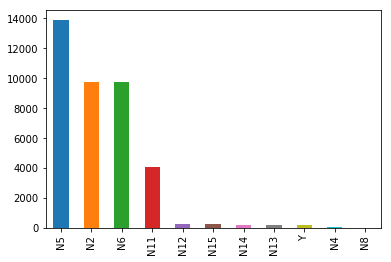

In [120]:
df_all_all = pd.read_csv(path_all_all + 'Results.txt', sep='\t')
print('all_all total: ' + str(len(df_all_all.index)))
df_all_all.MIRNA.value_counts().plot('bar')


In [121]:
df_all_all = df_all_all[df_all_all.MIRNA == 'Y']
print('all_all ' + str(len(df_all_all.index)))


all_all 139


all_21 33556


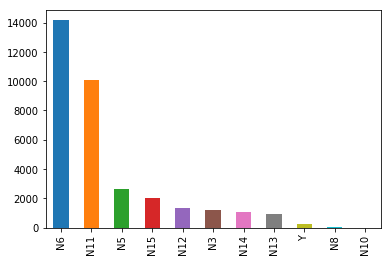

In [123]:
df_all_21 = pd.read_csv(path_all_21 + 'Results.txt', sep='\t')
df_all_21.MIRNA.value_counts().plot('bar')
print('all_21 ' + str(len(df_all_21.index)))

In [124]:
df_all_21 = df_all_21[df_all_21.MIRNA == 'Y']
print('all_21 miRNA ' + str(len(df_all_21.index)))

all_21 miRNA 212


mite_all 1203406


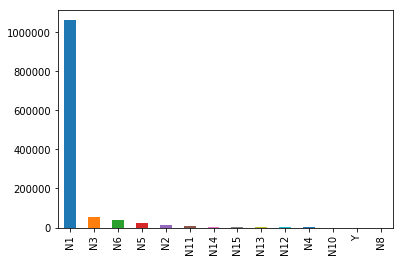

In [125]:
df_mite_all = pd.read_csv(path_mite_all + 'Results.txt', sep='\t')
df_mite_all.MIRNA.value_counts().plot('bar')
print('mite_all ' + str(len(df_mite_all.index)))

In [127]:
df_mite_all = df_mite_all[df_mite_all.MIRNA == 'Y']
print('mite_all ' + str(len(df_mite_all.index)))
df_mite_all.to_csv(path_mite_all + 'Results.valid.csv', sep='\t', index=None)

mite_all 45


mite_21 1203406


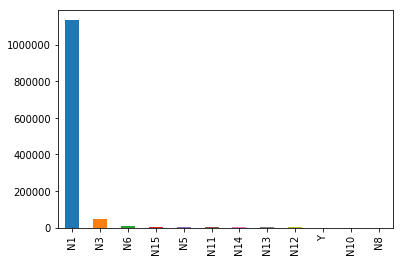

In [128]:
df_mite_21 = pd.read_csv(path_mite_21 + 'Results.txt', sep='\t')
df_mite_21.MIRNA.value_counts().plot('bar')
print('mite_21 ' + str(len(df_mite_21.index)))

In [129]:
df_mite_21 = df_mite_21[df_mite_21.MIRNA == 'Y']
print('mite_21 ' + str(len(df_mite_21.index)))

mite_21 93


In [ ]:
#all miRNA and MITEs

In [22]:
yeses = 0
stuff = []
total = 0
for k, v in df_all_all.iterrows():
    total += 1
    seqname = v['#Locus'].split(':')[0]
    start = v['#Locus'].split(':')[1].split('-')[0]
    end = v['#Locus'].split(':')[1].split('-')[1]
    ss = False
    for k2, v2 in df_mite_all.iterrows():
        seqname2 = v2['#Locus'].split(':')[0]
        if seqname2 != seqname:
            continue
        start2 = v2['#Locus'].split(':')[1].split('-')[0]
        end2 = v2['#Locus'].split(':')[1].split('-')[1]
        if int(start) <= int(end2) and int(end) >= int(start2):
            stuff_ = {}
            stuff_['miRNA_cluster_locus'] = v['#Locus']
            stuff_['miRNA_cluster_name'] = v['Name']
            stuff_['MITE_miRNA_cluster_locus'] = v2['#Locus']
            stuff_['MITE_miRNA_cluster_name'] = v2['Name']
            stuff.append(stuff_)
            ss = True
            break
    if ss:
        yeses += 1
yeses * 100 / total

6.474820143884892

In [ ]:
#21nt miRNA and MITEs

In [23]:
yeses = 0
stuff = []
total = 0
for k, v in df_all_21.iterrows():
    total += 1
    seqname = v['#Locus'].split(':')[0]
    start = v['#Locus'].split(':')[1].split('-')[0]
    end = v['#Locus'].split(':')[1].split('-')[1]
    ss = False
    for k2, v2 in df_mite_21.iterrows():
        seqname2 = v2['#Locus'].split(':')[0]
        if seqname2 != seqname:
            continue
        start2 = v2['#Locus'].split(':')[1].split('-')[0]
        end2 = v2['#Locus'].split(':')[1].split('-')[1]
        if int(start) <= int(end2) and int(end) >= int(start2):
            stuff_ = {}
            stuff_['miRNA_cluster_locus'] = v['#Locus']
            stuff_['miRNA_cluster_name'] = v['Name']
            stuff_['MITE_miRNA_cluster_locus'] = v2['#Locus']
            stuff_['MITE_miRNA_cluster_name'] = v2['Name']
            stuff.append(stuff_)
            ss = True
            break
    if ss:
        yeses += 1
yeses * 100 / total

17.452830188679247

In [ ]:
#reverse

In [113]:
yeses = 0
stuff = []
total = 0
for k, v in df_mite_21.iterrows():
    total += 1
    seqname = v['#Locus'].split(':')[0]
    start = v['#Locus'].split(':')[1].split('-')[0]
    end = v['#Locus'].split(':')[1].split('-')[1]
    ss = False
    for k2, v2 in df_all_21.iterrows():
        seqname2 = v2['#Locus'].split(':')[0]
        if seqname2 != seqname:
            continue
        start2 = v2['#Locus'].split(':')[1].split('-')[0]
        end2 = v2['#Locus'].split(':')[1].split('-')[1]
        if int(start) <= int(end2) and int(end) >= int(start2):
            stuff_ = {}
            stuff_['miRNA_cluster_locus'] = v['#Locus']
            stuff_['miRNA_cluster_name'] = v['Name']
            stuff_['MITE_miRNA_cluster_locus'] = v2['#Locus']
            stuff_['MITE_miRNA_cluster_name'] = v2['Name']
            stuff.append(stuff_)
            ss = True
            break
    if ss:
        yeses += 1
yeses * 100 / total

#Locus                                      1A:572227266-572227394
Name             MITE_T_78325|chr6B|159156784|159156937|TT|157|...
Length                                                         129
Reads                                                            3
RPM                                                           0.24
UniqueReads                                                      1
FracTop                                                          1
Strand                                                           +
MajorRNA                                     CGUCCGGAAAUACUUGUCAUC
MajorRNAReads                                                    2
Complexity                                                   0.667
DicerCall                                                       21
MIRNA                                                            Y
PhaseScore                                                      -1
Short                                                         

53.763440860215056

In [ ]:
#21 pero no en all mites

In [114]:
yeses = 0
stuff = []
total = 0
for k, v in df_mite_21.iterrows():
    total += 1
    seqname = v['#Locus'].split(':')[0]
    start = v['#Locus'].split(':')[1].split('-')[0]
    end = v['#Locus'].split(':')[1].split('-')[1]
    ss = False
    for k2, v2 in df_mite_all.iterrows():
        seqname2 = v2['#Locus'].split(':')[0]
        if seqname2 != seqname:
            continue
        start2 = v2['#Locus'].split(':')[1].split('-')[0]
        end2 = v2['#Locus'].split(':')[1].split('-')[1]
        if int(start) <= int(end2) and int(end) >= int(start2):
            stuff_ = {}
            stuff_['miRNA_cluster_locus'] = v['#Locus']
            stuff_['miRNA_cluster_name'] = v['Name']
            stuff_['MITE_miRNA_cluster_locus'] = v2['#Locus']
            stuff_['MITE_miRNA_cluster_name'] = v2['Name']
            stuff.append(stuff_)
            ss = True
            break
    if ss:
        yeses += 1
    else:
        print(v['#Locus'])
yeses * 100 / total

1A:169645857-169646029
1A:169645864-169646038
1A:169645881-169646012
1A:169645888-169645980
1A:572227266-572227394
1B:707531-707754
1B:673858846-673858937
1D:249561596-249561672
1D:438320267-438320450
1D:478229638-478229742
1D:478229646-478229734
2A:40832205-40832312
2B:244535408-244535491
2B:481164328-481164413
2D:64182564-64182656
2D:64182572-64182641
3A:562203337-562203579
3B:173047524-173047633
3B:173047540-173047614
3B:252930359-252930462
3B:417370136-417370221
3B:526694750-526694857
3B:526694768-526694841
3B:747332450-747332530
3D:46584841-46585004
4A:68157179-68157288
4A:68157191-68157282
4A:564166476-564166583
4A:607427305-607427389
4A:613542539-613542645
4A:613542555-613542629
4A:682754004-682754099
4B:95109991-95110116
4B:115550252-115550339
4B:169596284-169596416
4B:400685248-400685540
4B:653543833-653543904
4B:671800592-671800679
4D:294003880-294003994
4D:294003919-294004000
4D:385736109-385736382
5A:395291342-395291419
5B:339536824-339536961
5B:687805605-687805695
5B:68780

39.784946236559136

In [24]:
#mirBASE with 21

In [36]:
records = []
for k,v in df_mite_21.iterrows():
    record = SeqRecord(Seq(v.MajorRNA), id=v['#Locus'], description=v['Name'])
    records.append(record)
SeqIO.write(records, path_mite_21_seqs, 'fasta')
path_mite_21_seqs

'/home/juan/Desktop/juan/bio/mrcv/data/ss_temp/mite_21/mir.Y.fasta'

In [108]:
df_mirbase = pd.read_csv(path_mirbase, sep="\t")
cols = ['qseqid','sseqid','qstart','qend','sstart','send','mismatch','gaps','pident','evalue','length','qlen','slen','qcovs']
df_mirbase.columns = cols
print(len(df_mirbase.index))
df_mirbase.head(2)

876


,qseqid,sseqid,qstart,qend,sstart,send,mismatch,gaps,pident,evalue,length,qlen,slen,qcovs
0,1A:169645857-169646029,oga-miR-29b,5,16,17,6,0,0,100.0,0.34,12,21,23,57
1,1A:169645857-169646029,nle-miR-29c,5,16,17,6,0,0,100.0,0.34,12,21,22,57


In [109]:
df_mirbase = df_mirbase[df_mirbase.length >= df_mirbase.qlen - 2]
print('lenght >= (length -2) ' + str(len(df_mirbase.index)))

lenght >= (length -2) 31


In [110]:
df_mirbase = df_mirbase[df_mirbase.mismatch + df_mirbase.gaps <= 2]
print('gaps <= 2 ' + str(len(df_mirbase.index)))

gaps <= 2 27


In [112]:
print('MITEs with miRBASE results ' + str(len(df_mirbase.qseqid.unique().tolist())))

MITEs with miRBASE results 16


In [59]:
df_mirbase_s = df_mirbase.groupby('qseqid')#['sseqid'].apply(lambda x: "%s" % ', '.join(x))

In [60]:
df_mirbase_s

In [44]:
#add miRBASE annotation to df_mite_21

In [62]:
df_mite_21['miRBASE'] = ''
for k_mite, v_mite in df_mite_21.iterrows():
    for name, group in df_mirbase_s:
        if v_mite['#Locus'] == name:
            df_mite_21.at[k_mite, 'miRBASE'] += ','.join(group.sseqid.tolist()) + '.'

In [65]:
#genomic annotation

In [67]:
df_ann = pd.read_csv(file_ann, index_col=False, sep='\t', comment='#', header=None)
df_ann.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
print('all features: ' + str(len(df_ann.index)))

all features: 2573233


In [68]:
df_ann = df_ann[
    (df_ann.feature == 'intron') | 
    (df_ann.feature == 'exon') | 
    (df_ann.feature == 'three_prime_UTR') | 
    (df_ann.feature == 'five_prime_UTR')]
print('gene-related features: ' + str(len(df_ann.index)))

gene-related features: 1593666


In [69]:
df_ann_promoters = pd.read_csv(file_ann_promoters, index_col=False, sep='\t', comment='#', header=None)
df_ann_promoters.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
print('promoters: ' + str(len(df_ann_promoters.index)))

promoters: 120744


In [70]:
df_ann_total = pd.concat([df_ann, df_ann_promoters])
print('total: ' + str(len(df_ann_total.index)))

total: 1714410


In [81]:
df_mite_21['seqname'] = df_mite_21['#Locus'].str.split(':').str[0]
df_mite_21['start'] = df_mite_21['#Locus'].str.split(':').str[1].str.split('-').str[0]
df_mite_21['end'] = df_mite_21['#Locus'].str.split(':').str[1].str.split('-').str[1]

In [82]:
df_mite_21.head(3)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,21,22,23,24,miRBASE,feature,gene,seqname,start,end
15275,1A:169645857-169646029,MITE_T_62663|chr6B|624472362|624472543|TTTAAA|...,173,9,0.719,1,1.0,+,UAGAGAUUUCAAAUGGAACAC,7,...,9,0,0,0,,,,1A,169645857,169646029
15276,1A:169645864-169646038,MITE_T_58158|chr2D|446317622|446317827|AT|219|...,175,9,0.719,1,1.0,+,UAGAGAUUUCAAAUGGAACAC,7,...,9,0,0,0,,,,1A,169645864,169646038
15277,1A:169645881-169646012,MITE_T_83087|chr3D|7232862|7232993|TA|139|F3602,132,9,0.719,1,1.0,+,UAGAGAUUUCAAAUGGAACAC,7,...,9,0,0,0,,,,1A,169645881,169646012


In [92]:
df_mite_21['feature'] = 'intergenic'

In [93]:
df_mite_21['gene'] = ''
for k_mite, v_mite in df_mite_21.iterrows():
    cur = df_ann_total[df_ann_total.seqname == v_mite.seqname]
    for k_feature,v_feature in cur.iterrows():
        start = int(v_feature.start)
        end = int(v_feature.end)
        #overlaps with gene
        if int(v_mite.end) >= start and int(v_mite.start) <= end:
            #I dont want to replace 'UTRs with exon
            if v_feature.feature != 'three_prime_UTR' and  v_feature.feature != 'five_prime_UTR':
                df_mite_21.at[k_mite, 'feature'] = v_feature.feature
                df_mite_21.at[k_mite, 'gene'] = v_feature.attribute
                print (k_mite,v_mite.Name, v_feature.feature,v_feature.attribute)


15275 MITE_T_62663|chr6B|624472362|624472543|TTTAAA|197|F2512 intron Parent=transcript:TraesCS1A02G130800.1;Name=TraesCS1A02G130800.1-I4
15276 MITE_T_58158|chr2D|446317622|446317827|AT|219|F2230 intron Parent=transcript:TraesCS1A02G130800.1;Name=TraesCS1A02G130800.1-I4
15277 MITE_T_83087|chr3D|7232862|7232993|TA|139|F3602 intron Parent=transcript:TraesCS1A02G130800.1;Name=TraesCS1A02G130800.1-I4
15278 MITE_T_93138|chr7D|459917919|459918038|AT|41|F4033 intron Parent=transcript:TraesCS1A02G130800.1;Name=TraesCS1A02G130800.1-I4
124458 MITE_T_120271|chr2D|74975911|74975992|TA|85|F5488 intron Parent=transcript:TraesCS1D02G131000.1;Name=TraesCS1D02G131000.1-I1
131654 MITE_T_103443|chr2B|63783717|63783817|GT|101|F4618 exon Parent=transcript:TraesCS1D02G175400.1;Name=TraesCS1D02G175400.1-E2;constitutive=1;ensembl_end_phase=-1;ensembl_phase=1;exon_id=TraesCS1D02G175400.1-E2;rank=2
148203 MITE_T_53574|chr6B|71083889|71084110|TA|230|F2109 exon Parent=transcript:TraesCS1D02G352900.1;Name=TraesCS1D

In [100]:
len(df_mite_21.index)

93

In [99]:
df_mite_21.feature.value_counts()

intergenic    37
intron        34
promoter      15
exon           7
Name: feature, dtype: int64

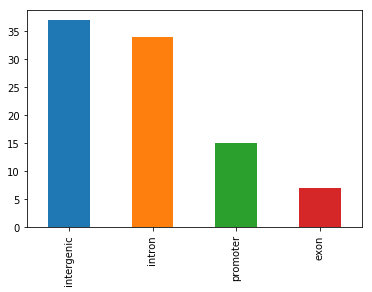

In [102]:
df_mite_21.feature.value_counts().plot('bar')

In [104]:
df_mite_21.to_csv(path_mite_21 + 'annotated.csv', sep='\t', index=None)